
# Chargement des données 
On charge nos données déja nettoyées

In [344]:
import pandas as pd
import matplotlib.pyplot as plt

cleaned_data = pd.read_csv("datas/cleanedData.csv")
labels = pd.read_csv("datas/labels.csv")
cleaned_data.drop("Attrition", axis=1, inplace=True)
cleaned_data.drop("EmployeeID", axis=1, inplace=True)
cleaned_data.insert(1,"Attrition", labels["Attrition"])
cleaned_data

,EnvironmentSatisfaction,Attrition,JobSatisfaction,WorkLifeBalance,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,...,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.252403,0,1.157359,-1.075518,-0.161282,-0.394993,-0.891282,-0.964277,1.405193,-0.677226,...,1.513267,3.225808,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
1,0.252403,1,-0.657940,1.750469,1.718161,0.099071,-1.867220,-0.964277,-0.492557,-1.077952,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
2,-0.661946,0,-0.657940,-2.488512,1.718161,0.963683,1.060595,1.746964,2.725773,-0.677226,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
3,1.166752,0,1.157359,0.337475,-2.040726,-0.889057,2.036534,0.843217,0.385846,0.124225,...,-0.660822,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4,1.166752,0,-1.565590,0.337475,-0.161282,0.099071,-1.867220,-0.964277,-0.885202,0.524950,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,0.252403,0,1.157359,0.337475,-0.161282,-0.642025,0.084657,-0.060530,-0.630737,-0.677226,...,1.513267,-0.310000,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4296,1.166752,0,-1.565590,0.337475,-0.161282,-0.518509,1.060595,-0.964277,-0.101400,0.124225,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668
4297,1.166752,0,1.157359,0.337475,-0.161282,-0.889057,1.060595,-0.964277,-0.813561,-0.276501,...,-0.660822,-0.310000,-0.192728,2.163404,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668
4298,-1.576295,0,0.249709,0.337475,-0.161282,1.951811,-0.891282,-0.060530,-0.596086,-1.077952,...,-0.660822,-0.310000,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668


## Creation du jeu de test et d'entrainement

In [345]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(cleaned_data, cleaned_data["Attrition"]):
    strat_train_set = cleaned_data.loc[train_index]
    strat_test_set = cleaned_data.loc[test_index]



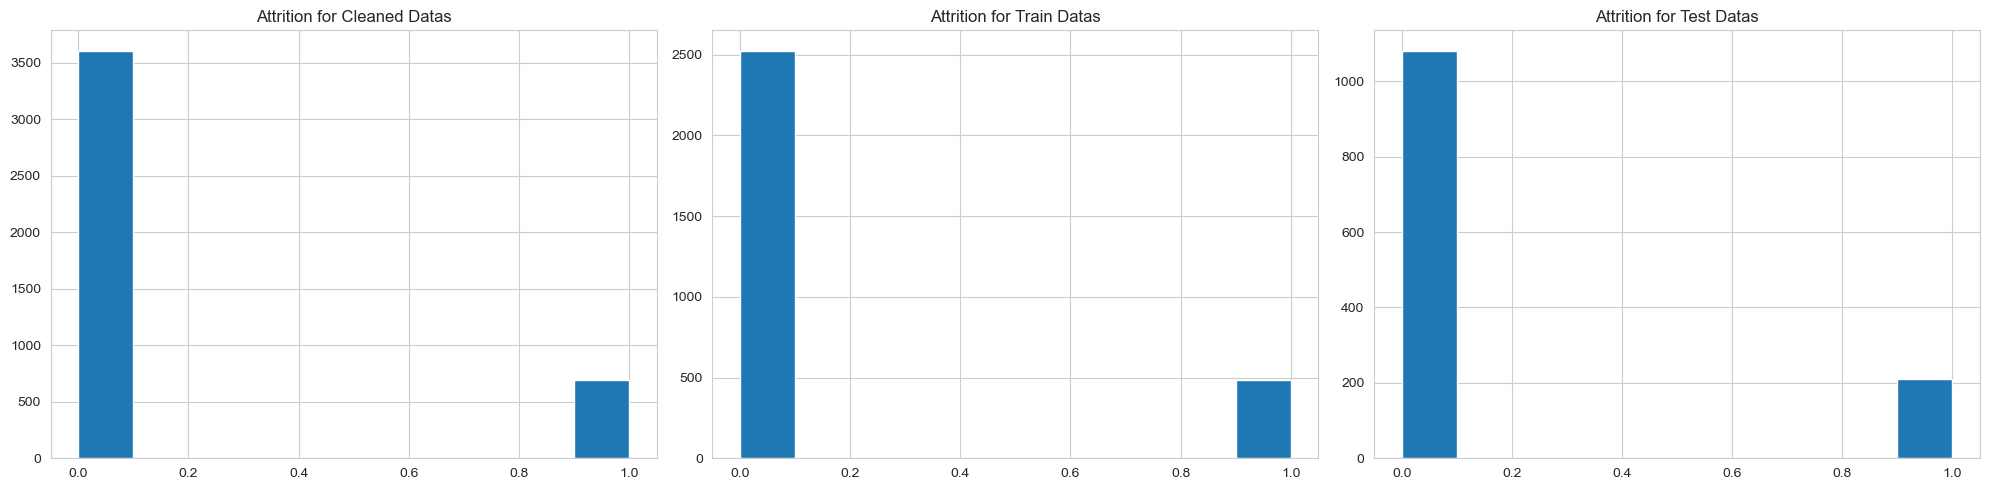

In [346]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].hist(cleaned_data["Attrition"])
axes[0].set_title('Attrition for Cleaned Datas')
axes[1].hist(strat_train_set["Attrition"])
axes[1].set_title('Attrition for Train Datas')

axes[2].hist(strat_test_set["Attrition"])
axes[2].set_title('Attrition for Test Datas')

plt.tight_layout()
plt.show()

## Test and train creation ##

In [347]:

x_train_set = strat_train_set.drop("Attrition",axis = 1)
y_train_set = strat_train_set["Attrition"].copy()

x_test_set = strat_test_set.drop("Attrition",axis = 1)
y_test_set = strat_test_set["Attrition"].copy()

In [348]:
#y_train_set,x_train_set,y_test_set,x_test_set

## Creation of fonction for testing ##

In [349]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, RocCurveDisplay, precision_score, recall_score
from sklearn import tree, metrics

'''def Fit_Model(model):
    model.fit(x_train_set, y_train_set)
    return model

def Rnd_Search(param_distribs, classifier):
    rnd_search = RandomizedSearchCV(classifier,
                                    param_distributions=param_distribs,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1',
                                    random_state=42)

    rnd_search.fit(x_train_set, y_train_set)
    return rnd_search

def Grid_Search(param_grid, classifier):
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               scoring='f1',
                               return_train_score=True)
    grid_search.fit(x_train_set, y_train_set)
    return grid_search

def Get_Accuracy_Score(model,Type):
    if Type == True :
        predictions = model.predict(x_train_set)
        return accuracy_score(y_train_set, predictions)
    elif Type == False :
        predictions = model.predict(x_test_set)
        return accuracy_score(y_test_set, predictions)
    
def Get_Precision_Score(model,Type):
    if Type == True :
        predictions = model.predict(x_train_set)
        return precision_score(y_train_set, predictions)
    elif Type == False :
        predictions = model.predict(x_test_set)
        return precision_score(y_test_set, predictions)

def Get_Recall_Score(model,Type):
    if Type == True :
        predictions = model.predict(x_train_set)
        return recall_score(y_train_set, predictions)
    elif Type == False :
        predictions = model.predict(x_test_set)
        return recall_score(y_test_set, predictions)
x
def Get_F1_Score(model,Type):
    if Type == True :
        predictions = model.predict(x_train_set)
        return f1_score(y_train_set, predictions)
    elif Type == False :
        predictions = model.predict(x_test_set)
        return f1_score(y_test_set, predictions, zero_division=1)

def Get_ROC_Curve(model, name):
    predictions = model.predict(x_test_set)

    fpr, tpr, thresholds = metrics.roc_curve(y_test_set, predictions)
    auc = metrics.roc_auc_score(y_test_set, predictions)
    plt.plot(fpr , tpr, label = name + " AUC = " + str(auc))
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.legend(loc = 4, prop = {'size': 10})
    plt.title(name +' - ROC Curve', fontsize=12)
    plt.show()

def Get_Confusion_Matrix(model, name):
    y_pred = model.predict(x_test_set)

    conf_matrix = confusion_matrix(y_true = y_test_set, y_pred = y_pred)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title(name +' - Confusion Matrix', fontsize=12)
    plt.show()

def get_dt_graph(model):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model,
                       feature_names = x_test_set.columns,
                       class_names=['Left', "Stay"],
                       filled=True)

def Get_Model_Indicators(model, name,Type):
    model.fit(x_train_set, y_train_set)
    print (name + ' accuracy: ' + str(round(Get_Accuracy_Score(model,Type) * 100, 2)) + '%')
    print(name + ' F1 Score :' + str(Get_F1_Score(model,Type)))
    Get_Confusion_Matrix(model, name)
    Get_ROC_Curve(model, name)'''

'def Fit_Model(model):\n    model.fit(x_train_set, y_train_set)\n    return model\n\ndef Rnd_Search(param_distribs, classifier):\n    rnd_search = RandomizedSearchCV(classifier,\n                                    param_distributions=param_distribs,\n                                    n_iter=100,\n                                    cv=5,\n                                    scoring=\'f1\',\n                                    random_state=42)\n\n    rnd_search.fit(x_train_set, y_train_set)\n    return rnd_search\n\ndef Grid_Search(param_grid, classifier):\n    grid_search = GridSearchCV(classifier,\n                               param_grid,\n                               scoring=\'f1\',\n                               return_train_score=True)\n    grid_search.fit(x_train_set, y_train_set)\n    return grid_search\n\ndef Get_Accuracy_Score(model,Type):\n    if Type == True :\n        predictions = model.predict(x_train_set)\n        return accuracy_score(y_train_set, predictions)\n 

In [350]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

## Random Forest ##

### RMSE ###

In [437]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

forest_cla = RandomForestClassifier(random_state=42, n_estimators=10)
forest_cla.fit(x_train_set, y_train_set)


RandomForestClassifier(n_estimators=10, random_state=42)

### CROSS VAL sur 10 interation avec le train ##

In [438]:
from sklearn.model_selection import cross_val_score
#cross_val_score(forest_cla,x_train_set, y_train_set, cv=10, scoring="accuracy")

### Proba for all train ###

In [443]:
#y_probas_forest = cross_val_predict(forest_cla,x_train_set, y_train_set, cv=10)
y_probas_forest = forest_cla.predict(x_train_set)
y_probas_forest
#y_probas_forest

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [444]:
confusion_matrix(y_train_set, y_probas_forest)

array([[2524,    0],
       [   9,  477]], dtype=int64)

In [445]:
recall_score(y_train_set, y_probas_forest), precision_score(y_train_set, y_probas_forest),f1_score(y_train_set, y_probas_forest)

(0.9814814814814815, 1.0, 0.9906542056074766)

ROC

In [446]:
y_probas_forest = cross_val_predict(forest_clf, x_train_set, y_train_set, cv=10,
                                    method='predict_proba')
y_scores_forest=y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_set,y_scores_forest)

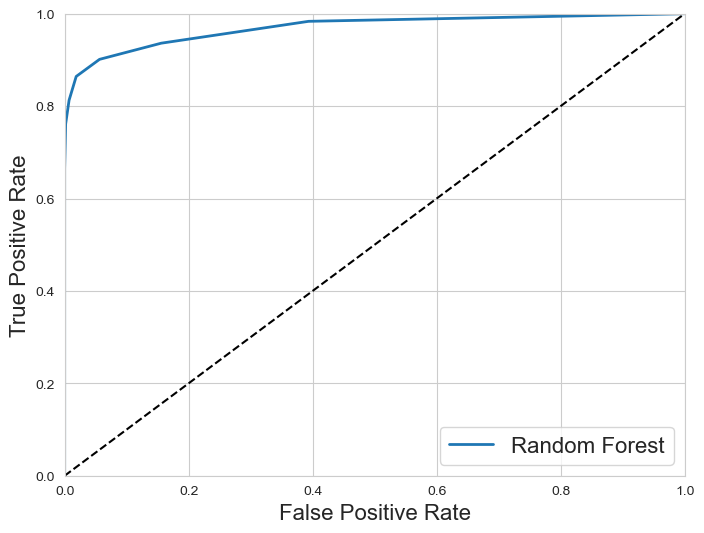

In [447]:
plt.figure(figsize=(8, 6))

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

## TEST

In [454]:

yt_probas_forest = forest_cla.predict(x_test_set)
yt_probas_forest

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [458]:
confusion_matrix(y_test_set, yt_probas_forest)

array([[1073,    8],
       [  54,  155]], dtype=int64)

In [459]:
recall_score(y_test_set, yt_probas_forest), precision_score(y_test_set, yt_probas_forest), f1_score(y_test_set, yt_probas_forest)

(0.7416267942583732, 0.950920245398773, 0.8333333333333334)

In [460]:
yt_probas_forest = cross_val_predict(forest_clf, x_test_set, y_test_set, cv=10,
                                     method='predict_proba')
yt_scores_forest=yt_probas_forest[:,1]
yt_scores_forest


array([0.1, 0.9, 0.1, ..., 0.1, 0.1, 0. ])

In [461]:

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test_set,yt_scores_forest)

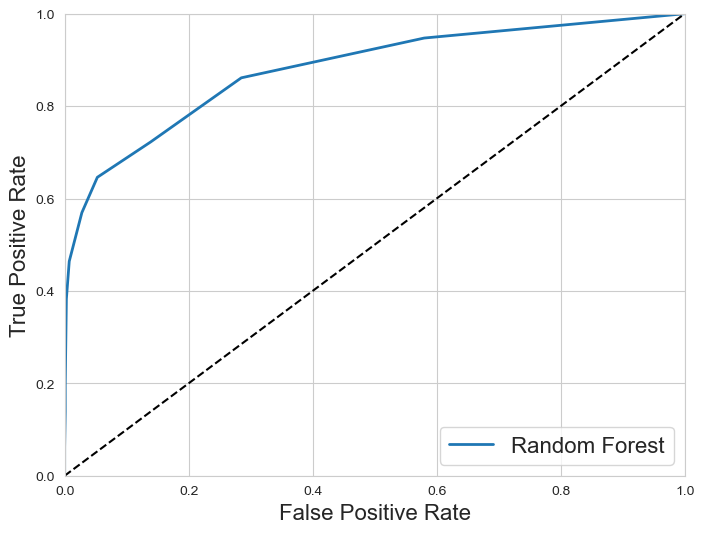

In [462]:


plt.figure(figsize=(8, 6))

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [463]:
def Rnd_Search(param_distribs, classifier):
    rnd_search = RandomizedSearchCV(classifier,
                                    param_distributions=param_distribs,
                                    n_iter=100,
                                    cv=5,
                                    scoring='f1',
                                    random_state=42)

    rnd_search.fit(x_train_set, y_train_set)
    return rnd_search

def Grid_Search(param_grid, classifier):
    grid_search = GridSearchCV(classifier,
                               param_grid,
                               scoring='f1',
                               return_train_score=True)
    grid_search.fit(x_train_set, y_train_set)
    return grid_search

In [464]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [342]:
Rnd = Rnd_Search(forest_cla,random_grid)

InvalidParameterError: The 'estimator' parameter of RandomizedSearchCV must be an object implementing 'fit'. Got {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]} instead.